### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [222]:
# 라이브러리 및 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('D:/류영표강사20230501/archive2/diabetes.csv')


In [223]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [224]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [225]:
df.shape

(768, 9)

In [226]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Outcome
0    500
1    268
Name: count, dtype: int64


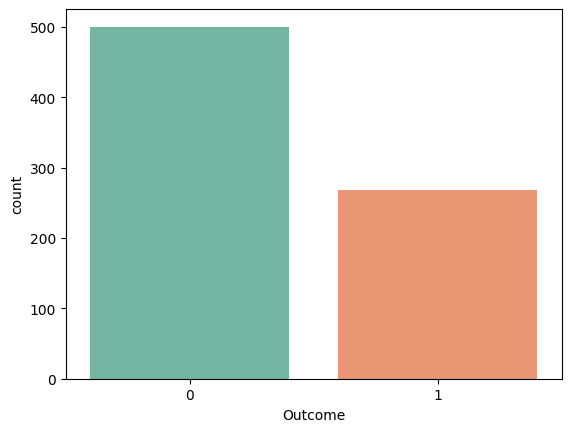

In [227]:
# 타겟 분포 확인
print(df['Outcome'].value_counts())
sns.countplot(x= 'Outcome', data = df, palette='Set2')
plt.show()

In [228]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [229]:
# 정보별 샘플수, 평균, 표준편차
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [230]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [231]:
# 상관계수 행렬 생성
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [232]:
# 상관계수 구하기
corr_df = corr_matrix.loc[:,'Outcome'].abs().sort_values(ascending=True)
corr_df

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

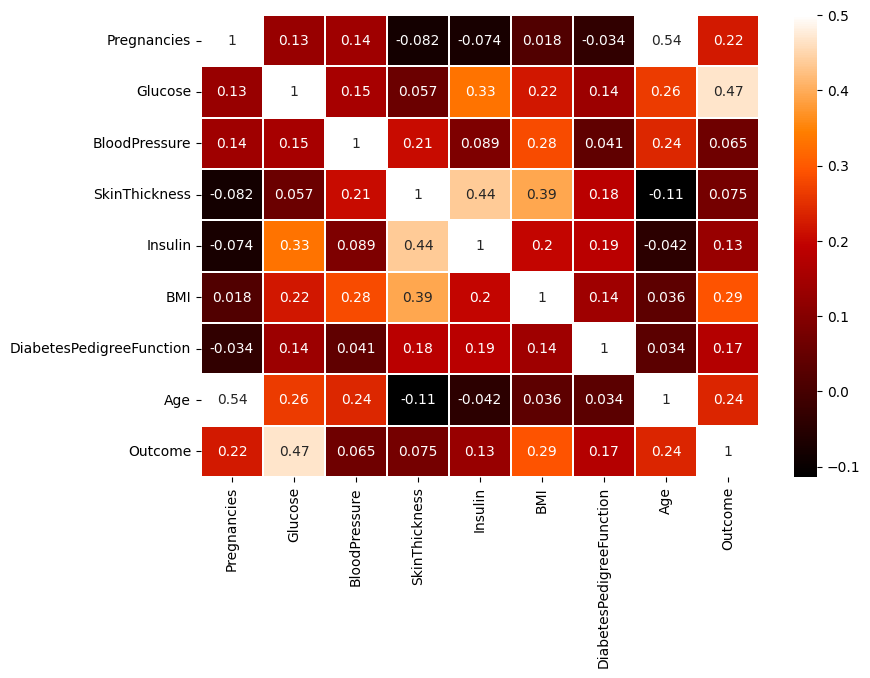

In [233]:
# 히트맵 그리기

# 그래프의 크기를 결정
plt.figure(figsize = (9,6))

# 항목 간의 상관 관계를 나타냄
sns.heatmap(df.corr(), linewidth = 0.1, vmax = 0.5, 
cmap = plt.cm.gist_heat, linecolor='white', annot=True)
# vmax는 밝기. cmap은 색을 불러옴
plt.show()



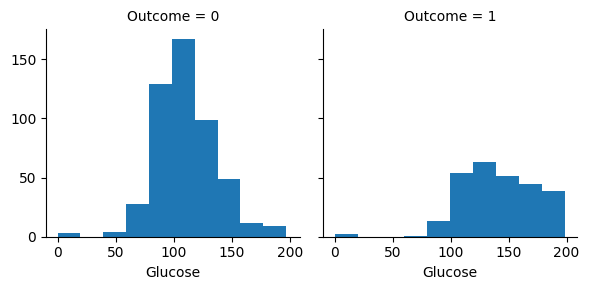

In [234]:
# Glucose(공복 혈당 농도)와 가장 상관관계가 가장 높음 0.466581
grid = sns.FacetGrid(df, col='Outcome')
grid.map(plt.hist, 'Glucose', bins=10)
plt.show()

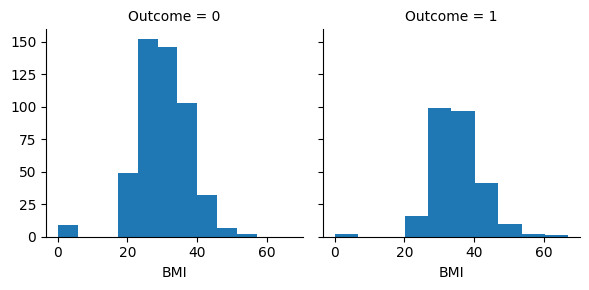

In [235]:
# BMI(체질량지수) 상관관계 0.292695
grid = sns.FacetGrid(df, col='Outcome')
grid.map(plt.hist, 'BMI', bins=10)
plt.show()

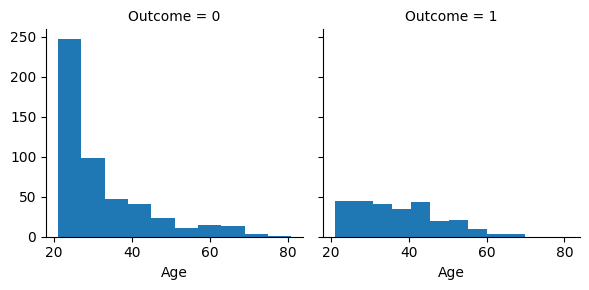

In [236]:
# Age(나이) 상관관계 0.238356
grid = sns.FacetGrid(df, col='Outcome')
grid.map(plt.hist, 'Age', bins=10)
plt.show() 

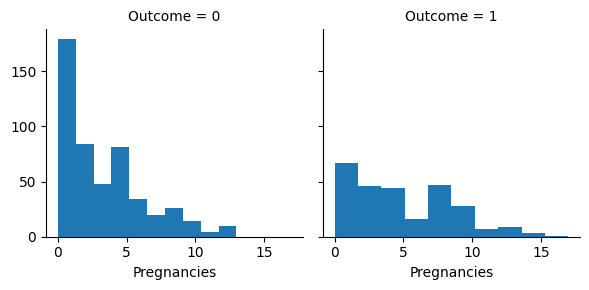

In [237]:
# Pregnancies(임신횟수) 상관관계 0.221898
grid = sns.FacetGrid(df, col='Outcome')
grid.map(plt.hist, 'Pregnancies', bins=10)
plt.show() 

In [238]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [239]:
df.describe()

# min 을 봤을때 당뇨병 혈통기능과 나이를 제외한 모든컬럼 0
# 글루코스,혈압,피부주름두께,BMI 는 0의 값일 수 없으므로 결측치일 가능성이 높음.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [240]:
# Outcome은 label값이기 때문에 제외
# 학습과 예측에 사용할 컬럼을 만들어줌
# 컬럼을 feature_columns 라는 변수에 저장
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화

In [241]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [242]:
# 결측치 여부 나타내는 데이터프레임 만들기
# 0값을 결측치라고 가정함.
# col에 저장한 칼럼에 대해 결측치 여부를 구하여 df_null 데이터프레임 저장

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()



Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [243]:
# Insulin 컬럼의 결측값이 가장 많은 것으로 보임. (374)
# 평균에 100을 곱하여 결측치의 비율 보기
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

### 결측치 시각화

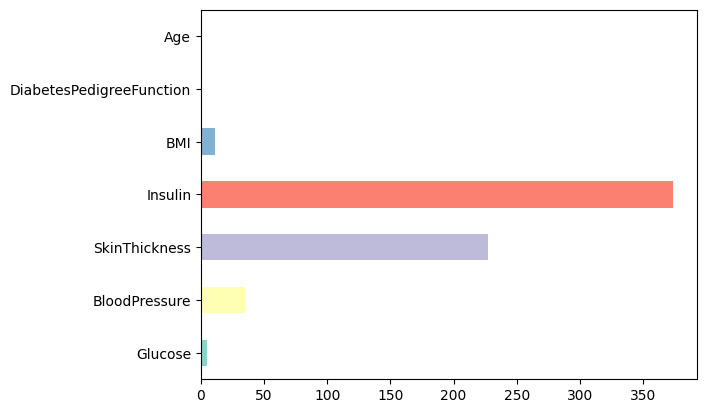

In [244]:
df_null.sum().plot.barh(color=sns.color_palette('Set3'))
plt.show()

<Axes: >

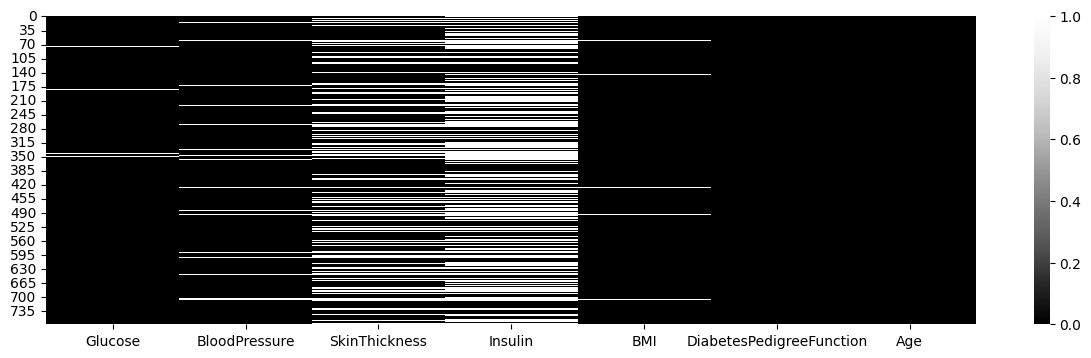

In [245]:
# 결측치 heatmap로 시각화
# heatmap 열분포도로 2차원 수치 데이터를 색으로 나타냄
# plt.figure 시각화 그래프 사이즈를 설정

plt.figure(figsize = ( 15, 4))
sns.heatmap(df_null, cmap = 'Greys_r')

# 결측치는 흰색으로 표현
# Insulin 컬럼에서 흰색이 많이 보임

### 정답값(outcome) 살펴보기 (with 임신 횟수)

In [246]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

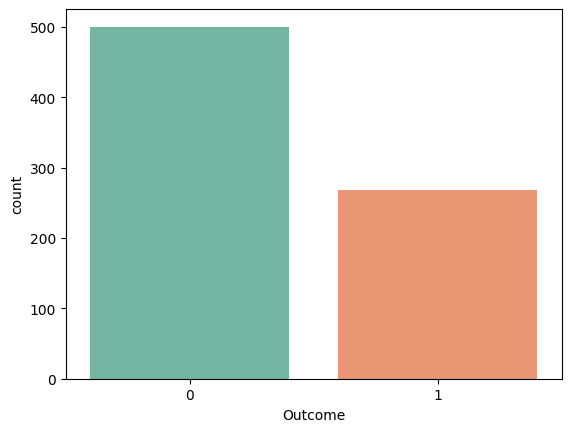

In [247]:
# 정답값('Outcome') 개수 살펴보기
print(df['Outcome'].value_counts())
sns.countplot(x= 'Outcome', data = df, palette='Set2')



Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


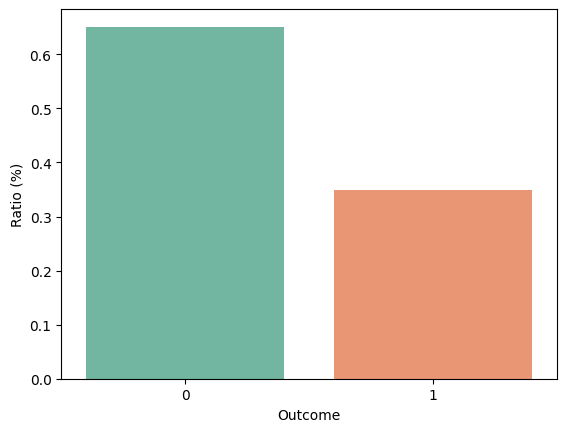

In [248]:
# 정답값('Outcome') 비율 살펴보기
# 당뇨병 발병할 확률 약65% , 발병 안할 확률 약35%
value_counts = df["Outcome"].value_counts(normalize=True)
print(value_counts)

sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')
plt.xlabel('Outcome')
plt.ylabel('Ratio (%)')
plt.show()

### 임신횟수와 정답값이 어떤 관련이 있을까?

In [249]:
# 데이터 셋에서 임신 횟수 groupby로 그룹화
# 결과값에 대한 비율과 수를 df_po에 저장 출력
# agg()함수 사용하여 여러 함수를 한번에 적용
# reset_index()를 통해 인덱스 리셋

df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

# 결과 : 임신 횟수가 14회 이상 되면 발병 확률이100% 되는것을 확인

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

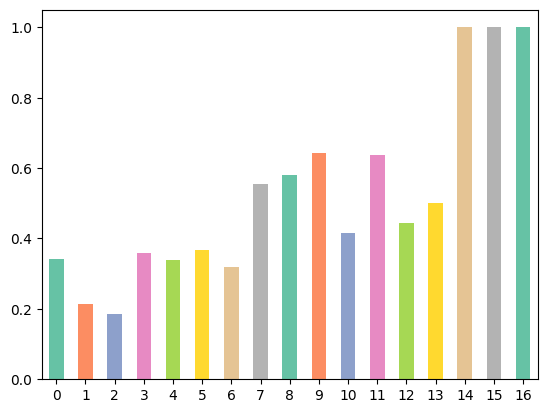

In [250]:
# 결과 : 임신 횟수가 14회 이상 되면 발병 확률이100% 되는것을 시각화로 확인
df_po['mean'].plot.bar(rot = 0 ,color=sns.color_palette('Set2')) # rot = 0 을 넣으면 x축 숫자가 세워짐

<Axes: xlabel='Pregnancies', ylabel='count'>

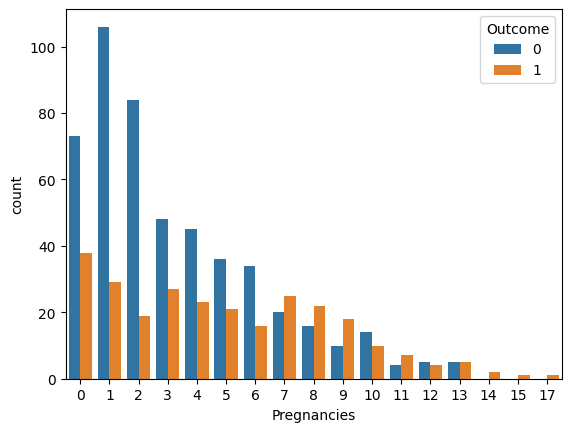

In [251]:
# countplot 로 시각화 해보기
# countplot는 범주형 변수의 빈도수를 시각화함.
# hue 변수에 카테고리 값을 입력하면 그 값에 따라 색상을 다르게 할 수 있음.

sns.countplot(data = df, x = 'Pregnancies', hue = 'Outcome')

# 임신 횟수가 6번까지는 발병하지 않을 확률이 더 높지만, 그 이상은 발병확률이 높음.

### 정답값 살펴보기 (whit BMI, Glucose, Insulin)
 - balplot을 이용
 - 정답값(Outcome) x축에 두고
 - BMI(체질량지수) , Glucose(포도당), Insulin(인슐린) 수치를 y값에 두고 각각 시각화



<Axes: xlabel='Outcome', ylabel='BMI'>

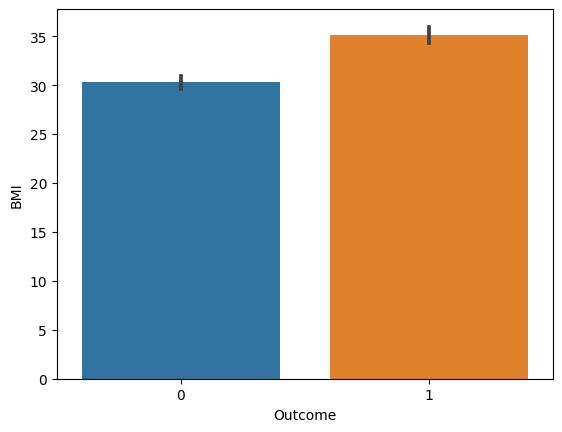

In [252]:
sns.barplot(data = df , x = 'Outcome', y = 'BMI')


<Axes: xlabel='Outcome', ylabel='Glucose'>

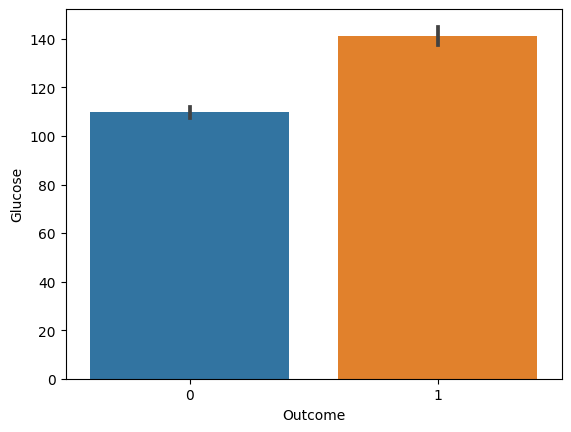

In [253]:
sns.barplot(data = df , x = 'Outcome', y = 'Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

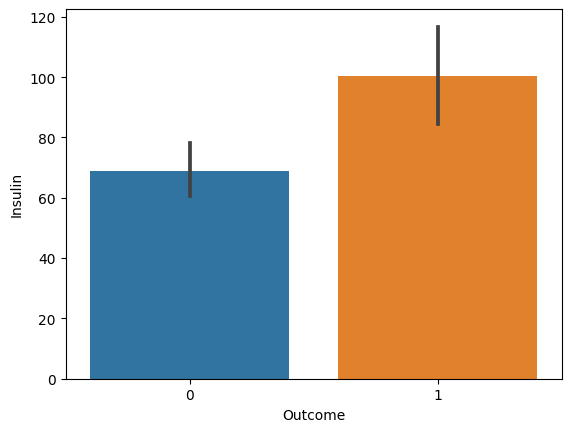

In [254]:
sns.barplot(data = df , x = 'Outcome', y = 'Insulin')

### 다른 시각화 함수 사용해보기
#### distplot
 - distplpt은 1개의 수치형 변수의 빈도수를 시각화 할때 사용
 - 그래프 곡선은 밀도 추정 곡선

C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\2719533762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

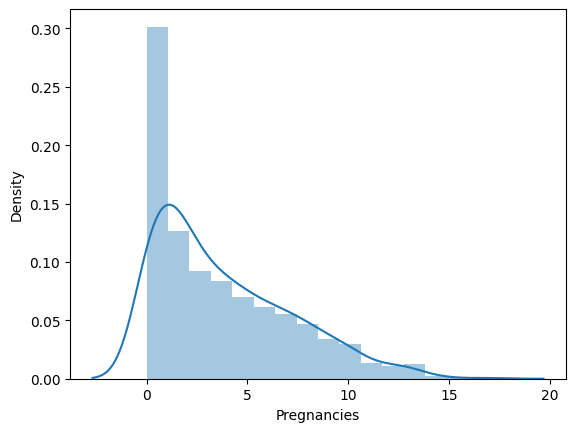

In [255]:
sns.distplot(df['Pregnancies'])

C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\3372954404.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])
C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\3372954404.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

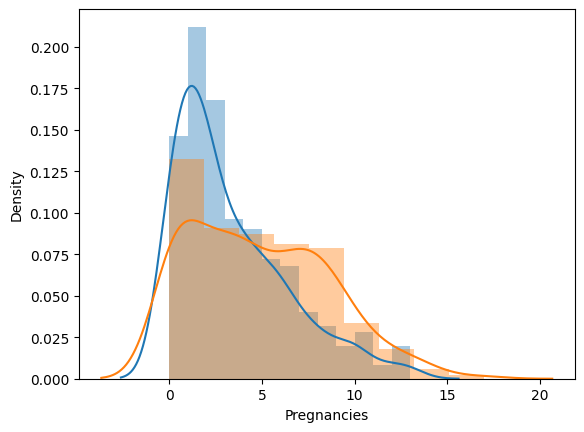

In [256]:
# 발병하지 않는 케이스 df_0
# 발병 케이스 df_1
# 그에 따른 임신 횟수를 distplot으로 시각화

df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

# 임신 횟수가 5회 넘어가면 발병률이 더 높은 것을 볼 수 있음.

C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\1131913557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'])
C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\1131913557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

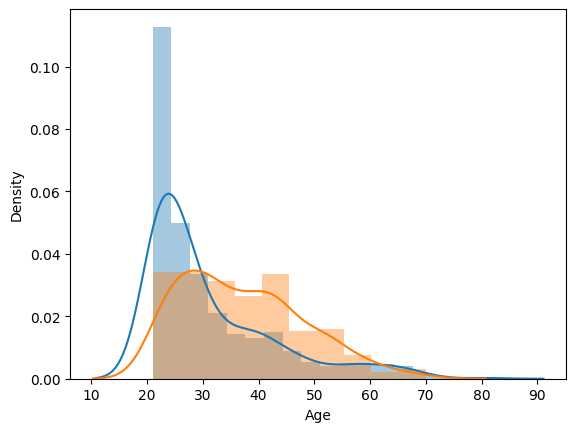

In [257]:
# 나이에 따라서 시각화
sns.distplot(df_0['Age'])
sns.distplot(df_1['Age'])

# 30세 이상부터 발별률이 높아지는것으로 보임.

C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\2829029363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Insulin'])
C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\2829029363.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

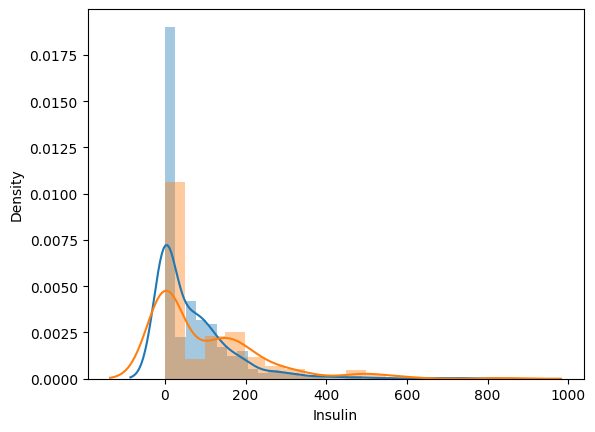

In [258]:
# 인슐린에 따라서 시각화
sns.distplot(df_0['Insulin'])
sns.distplot(df_1['Insulin'])


### Subplot
 - subplot은 한번에 여러 그래프를 보여주고자 할 때 사용하는 시각화방법
 - nrows에 열 개수, ncols에 컬럼개수, figsize에 크기를 지정

C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\1011373927.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
C:\Users\jaehong\AppData\Local\Temp\ipykernel_12268\1011373927.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][co

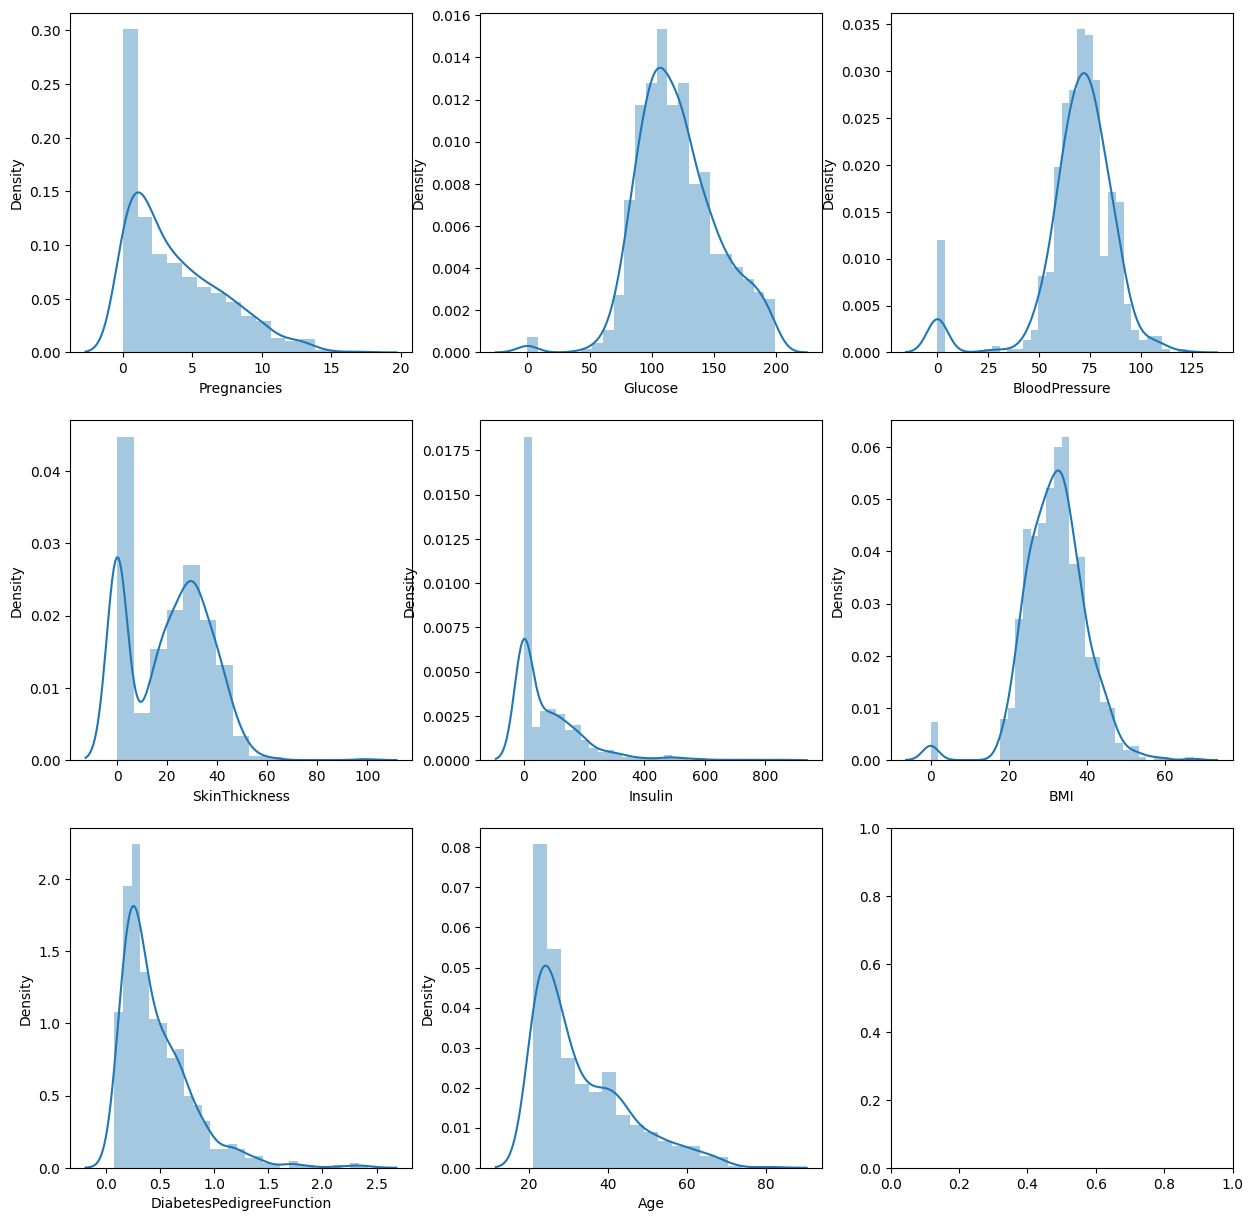

In [259]:
fig, axes = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15,15))
cols = df.columns[:-1].tolist()

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax = axes[row][col])


### Violinplot
 - violinplot은 데이터의 분포를 시각화
 - 가운데 힌색 점은 중각값, 두꺼운 선은 사분위 범위
 - 중앙의 얇은 선은 신뢰구간을 표현


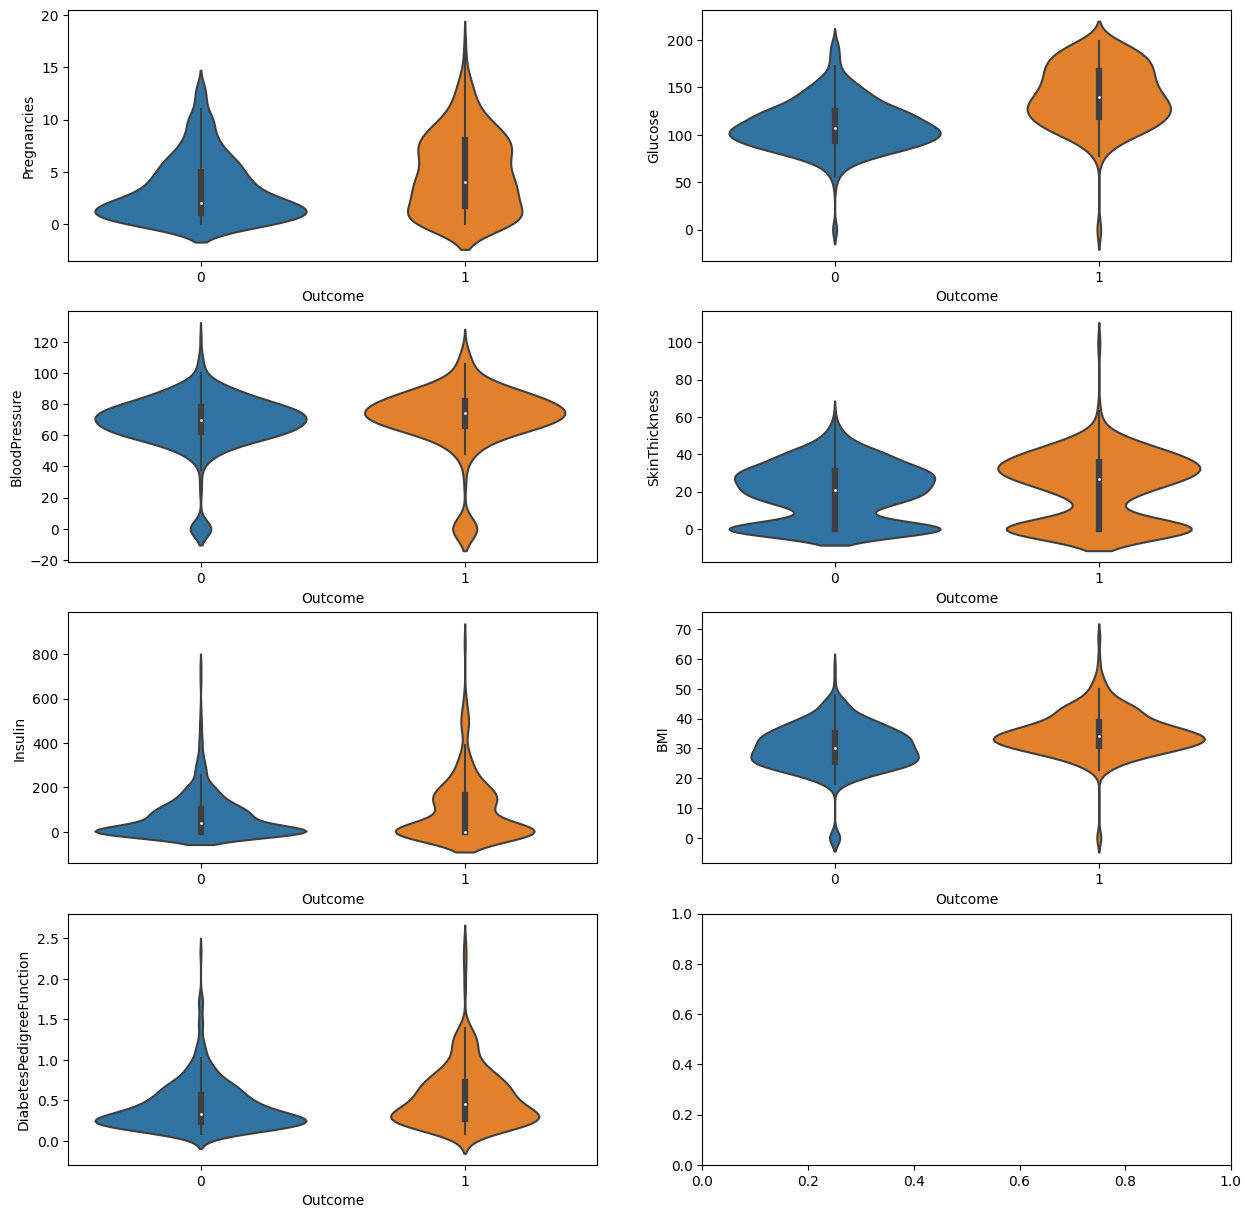

In [260]:
fig, axes = plt.subplots(nrows = 4 , ncols = 2, figsize = (15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])

### Regplot
- regplot은 scatter와 line을 함께 보여주는 시각화 방법
- 포도당과 인슐린으로 regplot 그리기

<Axes: xlabel='Glucose', ylabel='Insulin'>

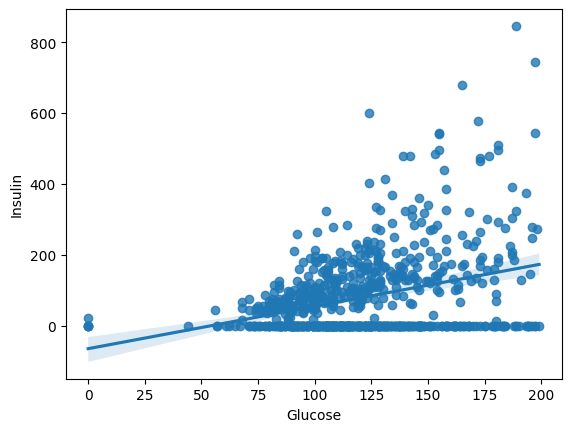

In [261]:
sns.regplot(data = df, x = 'Glucose', y = 'Insulin')

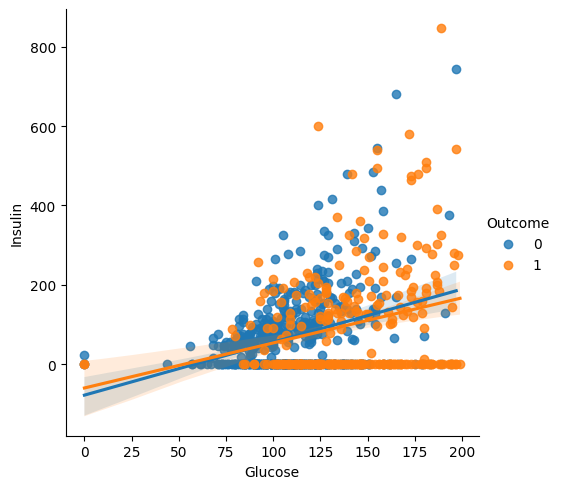

In [262]:
# regplot은 hue옵션이 없어서 색상을 다르게 지정못함.
# 이를 보완하기 위해 lmpolt을 사용

sns.lmplot(data = df, x = 'Glucose', y = 'Insulin', hue = 'Outcome')

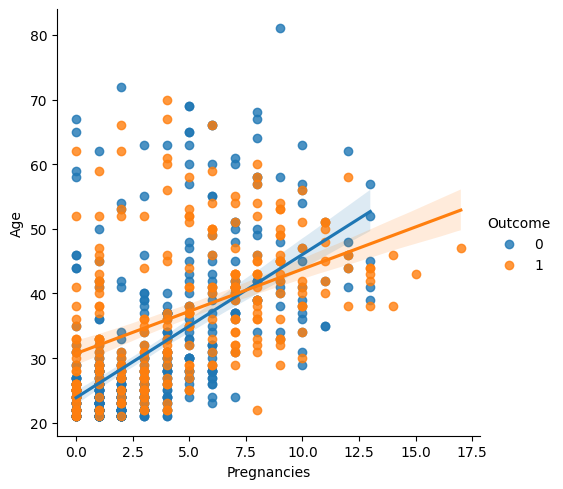

In [263]:
sns.lmplot(data = df, x = 'Pregnancies', y = 'Age', hue = 'Outcome')

### Pairplot
 - pairplot은 모든 컬럼에 대해 상관관계를 보여줌
 - 대각선은 자기 자신과의 상관관계합니다.
 - 데이터 셋에 적용
  

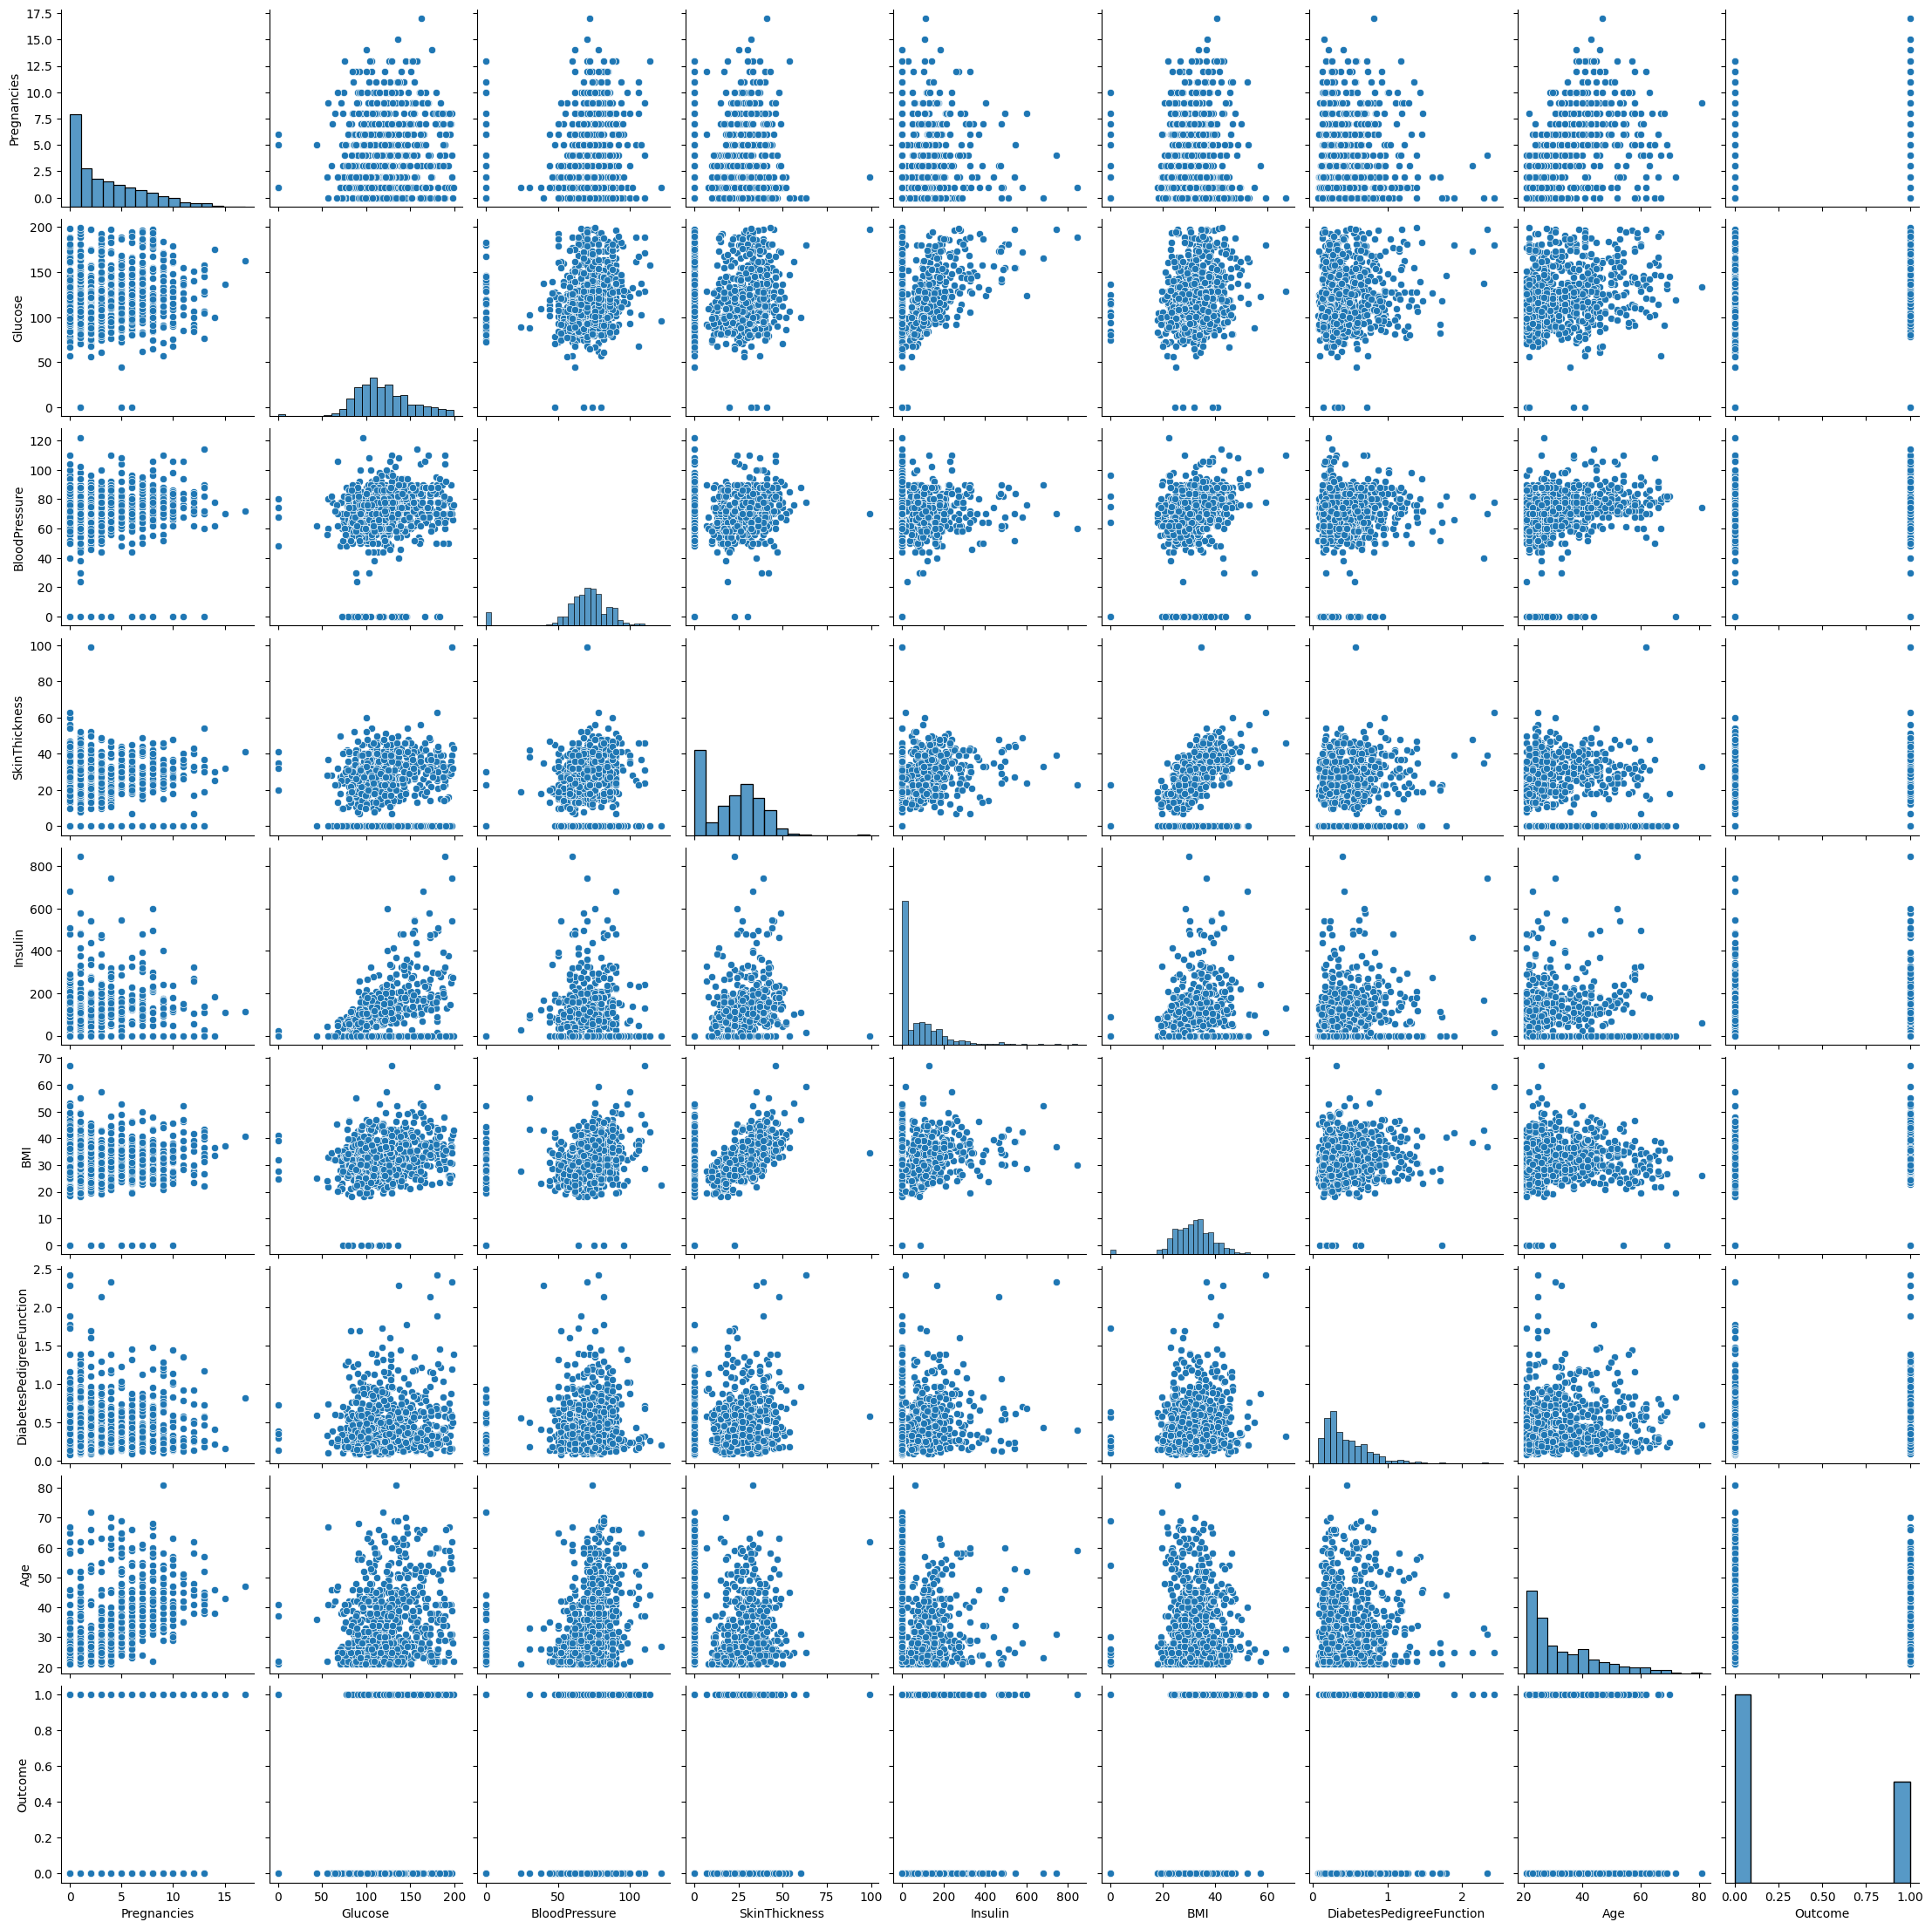

In [264]:
sns.pairplot(df)

### Pairgrid
 - pairgrid는 pairplot과 유사
 - hue옵션에 Outcome을 지정해 주고 ,sxatter로 그리도록 지정
 - Outcome과 겹쳐서 그려짐

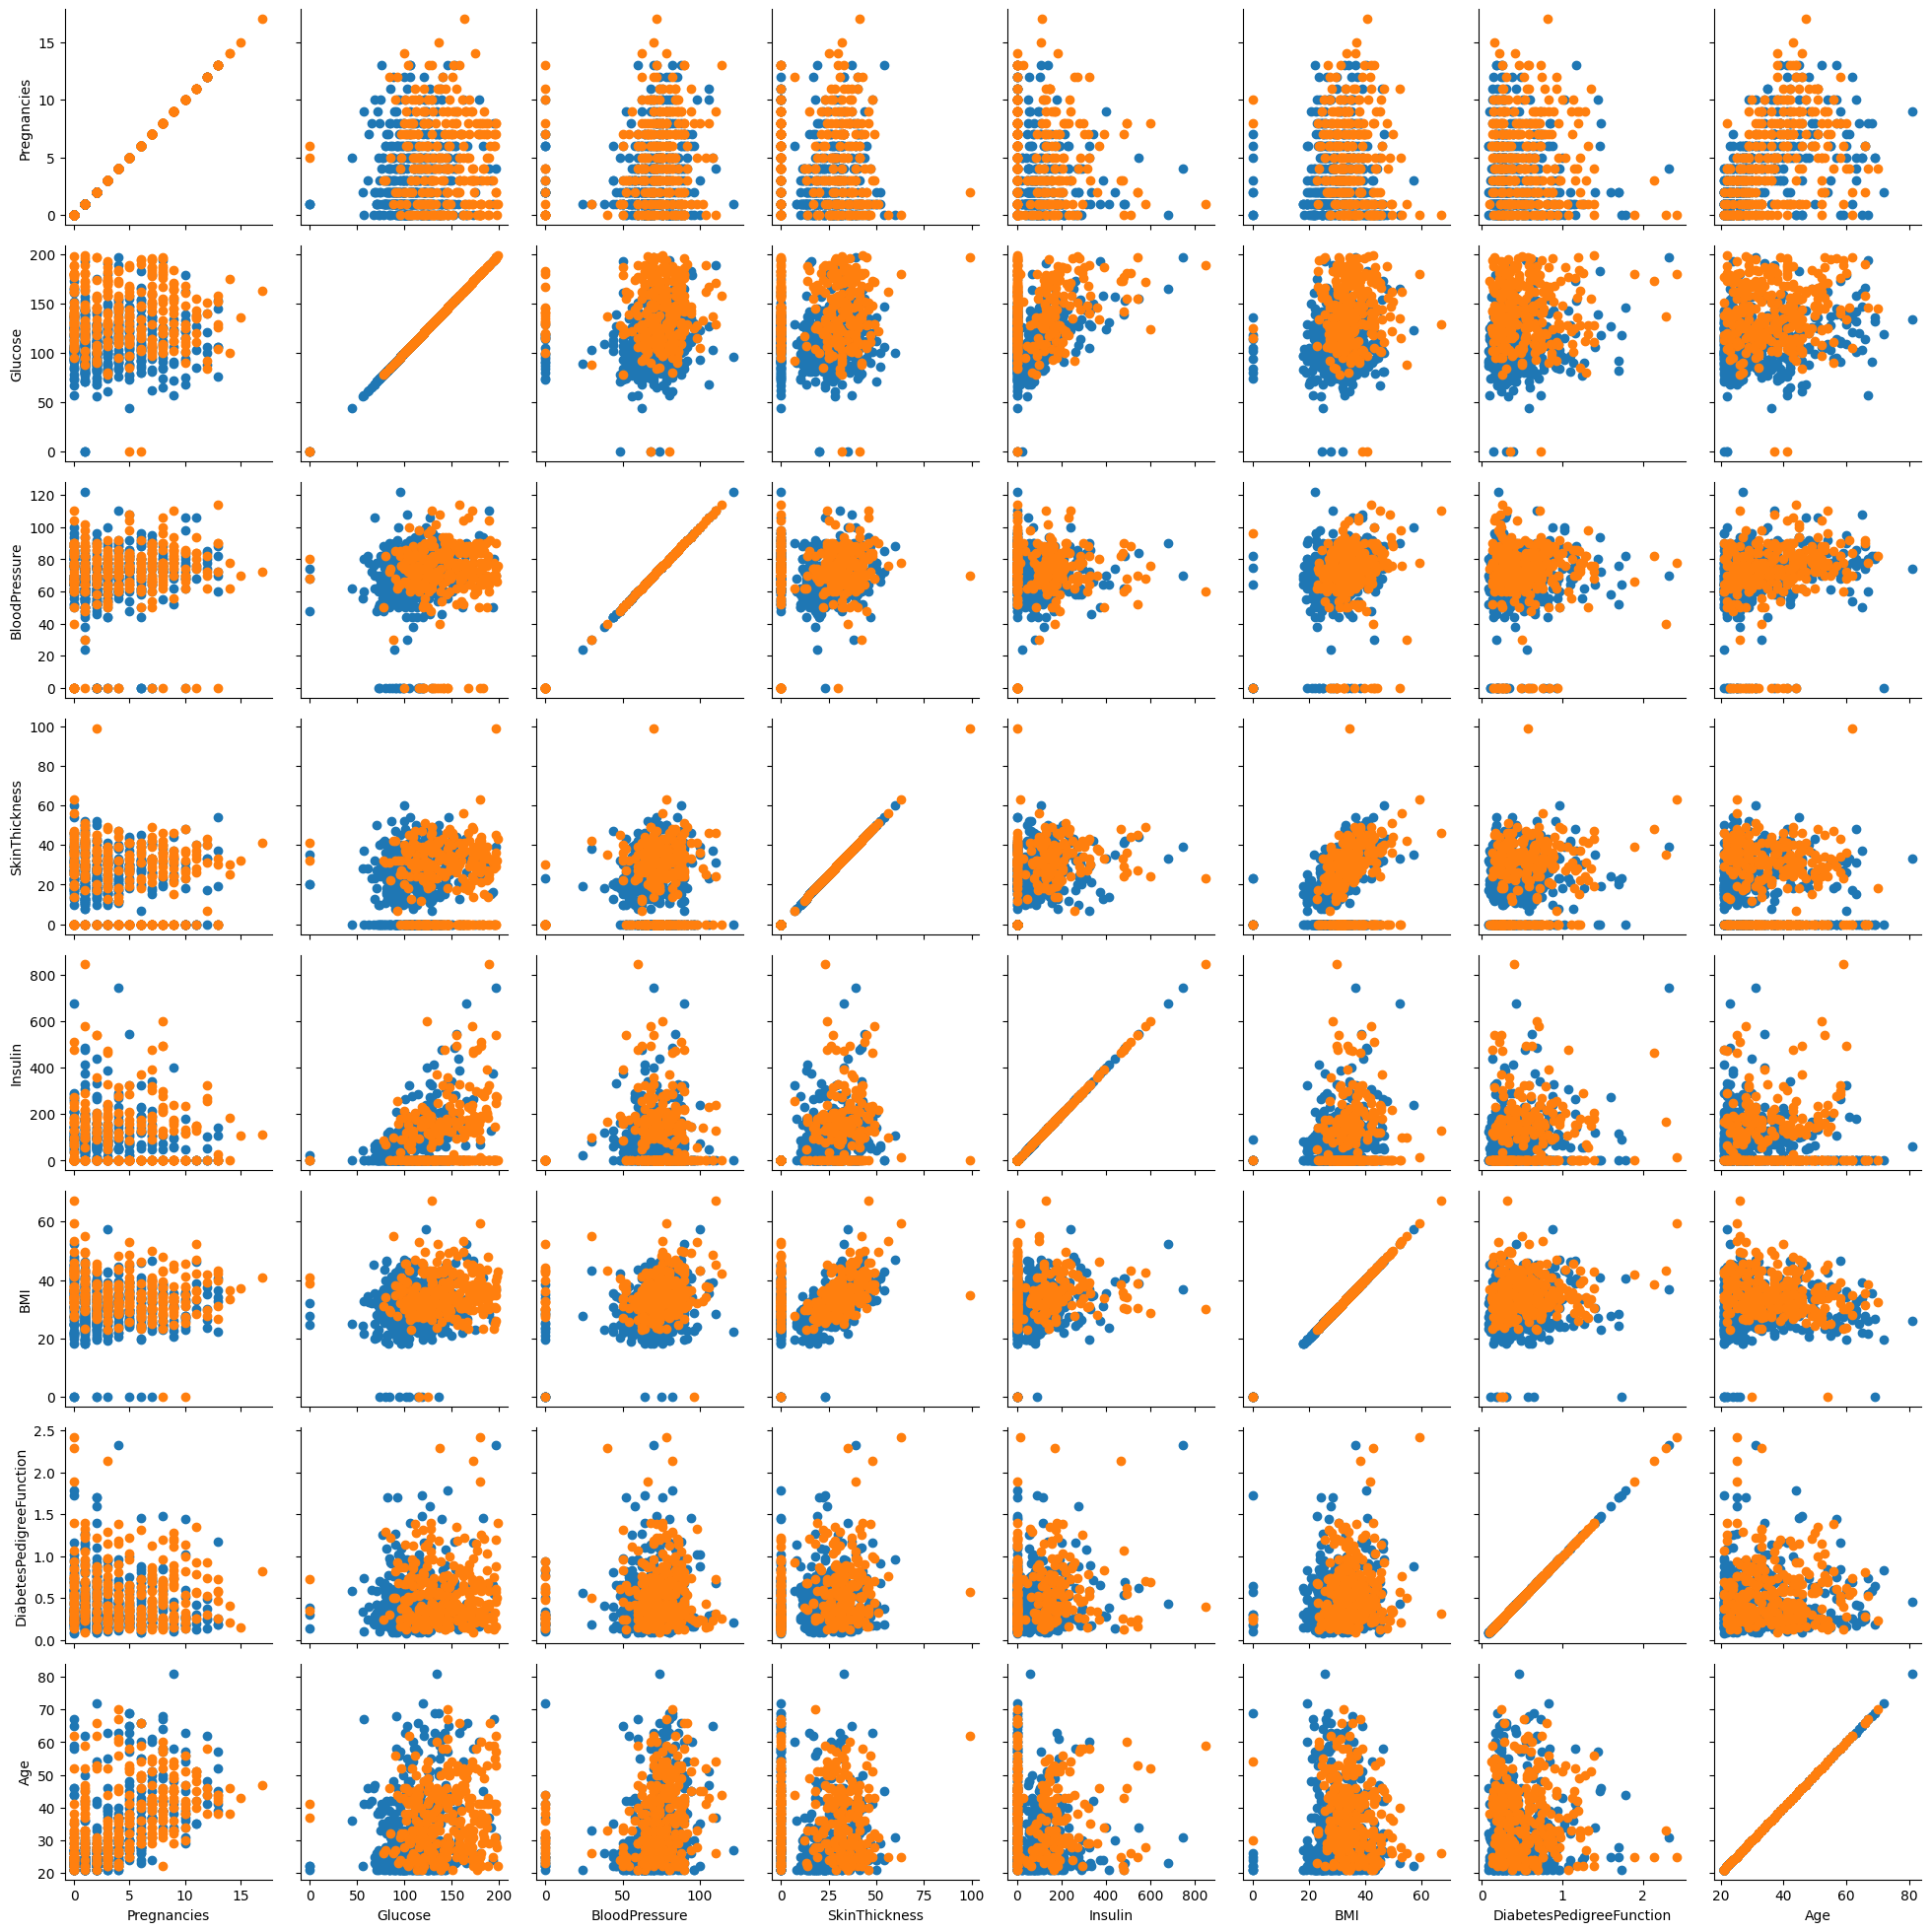

In [265]:
g = sns.PairGrid(df, hue = 'Outcome')
g.map(plt.scatter)

### 데이터 전처리 없이 모델 실행

In [285]:
df = pd.read_csv('D:/류영표강사20230501/archive2/diabetes.csv')

In [286]:
# 8:2의 비율로 구하기 위해 전체 데이터 행에서 80% 위치에 해당되는 값을
# 구해서 split_count라는 
split_count = int(df.shape[0] * 0.8)

In [287]:
# train, test로 슬라이싱을 통해 데이터를 나눈다
train = df[:split_count].copy()
test = df[split_count:].copy()

In [288]:
# feture_name라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
# Outcome 컬럼 제외한 모든
# tolist : list 타입으로 가져온다
feature_names = train.columns.tolist()
feature_names.remove('Outcome')

In [289]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.
# feature_name는 여러개의 칼럼을 가져오기 때문에 리스트 형태로 가져오고 label_name은 하나의
label_name = 'Outcome'

In [290]:
# 학습 세트 만들기
# train[feature] = feature_name에 해당되는 컬럼만 가져옴.
X_train = train[feature_names]

In [291]:
# 정답값(Outcome)을 만든다.
y_train = train[label_name]

In [292]:
# 예측에 사용할 데이터세트를 만든다.
X_test = test[feature_names]

In [293]:
# 예측의 정답값
y_test = test[label_name]

- 머신러닝 알고리즘 Decision Tree 불러오기

In [294]:
from sklearn.tree import DecisionTreeClassifier

In [295]:
model = DecisionTreeClassifier(random_state = 42)

In [296]:
# 학습
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [297]:
# 예측
y_predict = model.predict(X_test)

- 학습한 Descision Tree를 시각화

In [298]:
from sklearn.tree import plot_tree

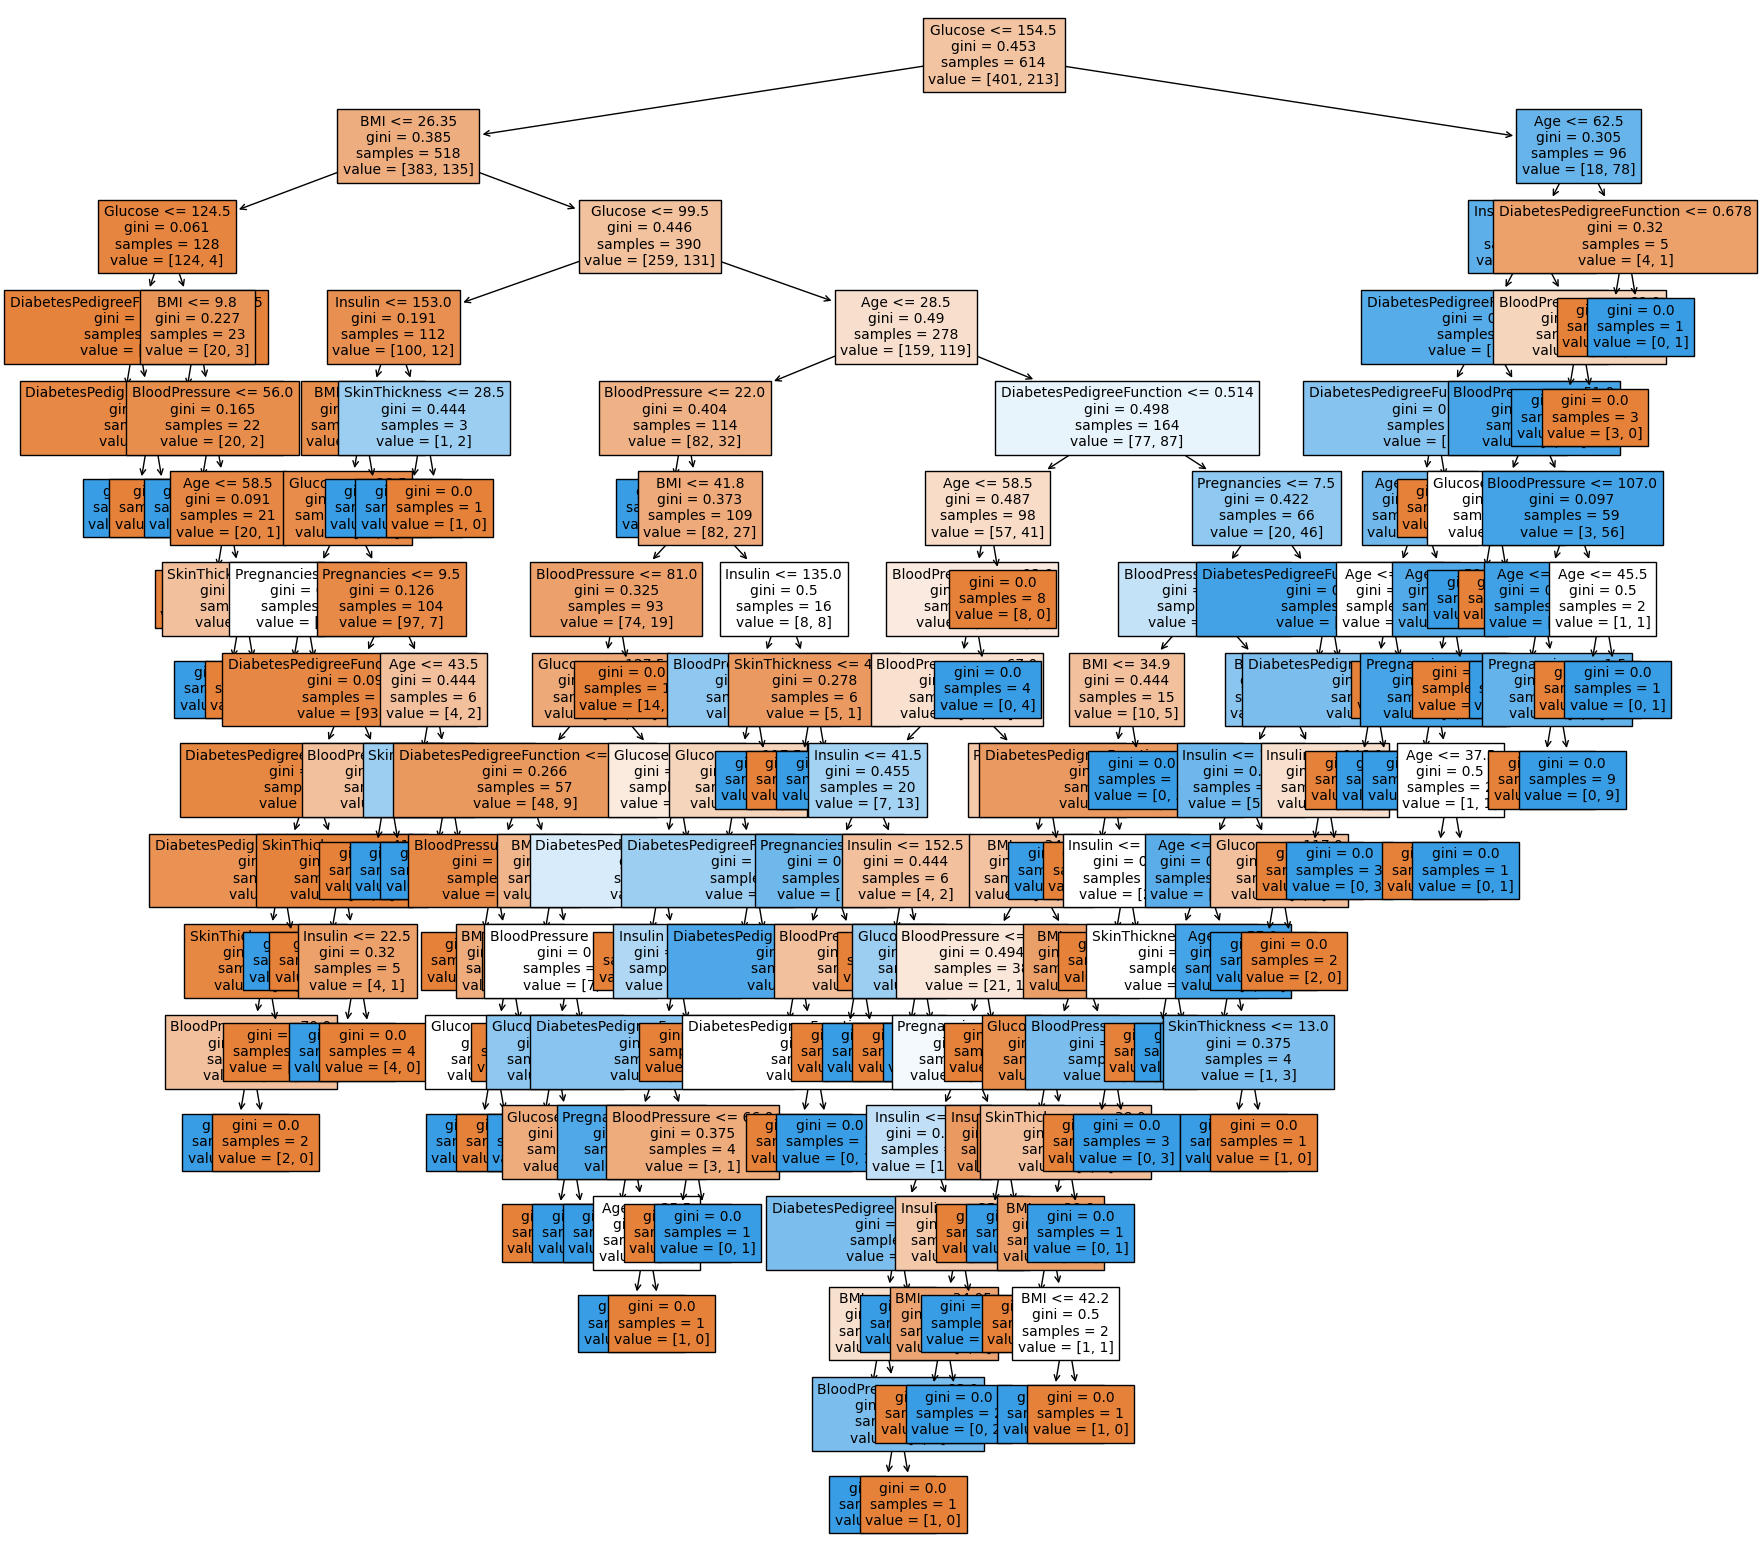

In [299]:
plt.figure(figsize=(20,20))
tree = plot_tree(model,
                feature_names = feature_names,
                filled = True,
                fontsize = 10)
# 맨 위 박스를 보면 Glucose가 가장 중요한 역활을 하고 있다는것을 알 수 있음.


In [301]:
# 정확도 살펴보기
# 실제값(y_test)에서 예측값(y_predict)값을 빼주면 같은 값은 0으로 나옴
# 여기서 절댓값을 적용한 값이 다르게 예측한 값, 1이 됨
# 이를 다 더한 것을 diff_count에 저장하고 출력

diff_count = abs(y_test - y_predict).sum()
diff_count


# 피쳐엔지니어링을 하지 않고 측정한 결과, diff_count의 값 44
# 즉,틀린개수가 44개라는 뜻

44

In [302]:
# 예측의 정확도를 구한다.
# 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 된.
(len(y_test) - diff_count) / len(y_test) * 100

71.42857142857143

### Feature Engineering
  - 정확도를 높이기 위해 피쳐 엔지니어링을 해봄
#### Feature Engineering란
 - 기존 변수를 사용해서 데이터에 정보를 추가하는 과정
 - 새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 유용하게     는
   만드는 방법
 - 모델 성등에 미치는 영향이 크기 때문에 아주 중요한 작업임
 - 데이터 탐색한 결과를 바탕으로 하니씩 건드려보며 정확도의 변화를 살펴봄

In [303]:
# Pregnacies_high라는 새로운 컬럼을 만들고 임신 횟수가 6번보다 많으면 True
# 아니면 False 로 지정
# 이는 수치형 변수를 범주형 변수로 변형하는 것.

df['Pregnancies_high'] = df['Pregnancies']>6
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)

In [304]:
# 학습과 예측에 사용할 컬럼들에서 Pregnancies컬럼도 제거

feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')

In [313]:
# 정도 살펴봄
diff_count = abs(y_test - y_predict).sum()
print(diff_count)
(len(y_test)-diff_count) / len(y_test) * 100

44


71.42857142857143

### 결측치 다루기 평균값

In [315]:
# isnull.sum()을 사용하여 결측치의 개수를 출력해봄
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
dtype: int64

In [348]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled,Insulin_nan_filled
count,768.000000,768.000000,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000,768.000000,768.000000,394.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,155.548223,31.992578,0.471876,33.240885,0.348958,0.220052,155.548223,155.548223,79.799479
std,3.369578,31.972618,19.355807,15.952218,118.775855,7.884160,0.331329,11.760232,0.476951,0.414551,118.775855,85.021108,115.244002
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000,0.000000,14.000000,14.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,76.250000,27.300000,0.243750,24.000000,0.000000,0.000000,76.250000,121.500000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.000000,0.372500,29.000000,0.000000,0.000000,125.000000,155.548223,30.500000
75%,6.000000,140.250000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000,0.000000,190.000000,155.548223,127.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,846.000000,846.000000,846.000000


- 결측치 개수는 모두 0 , describe()을 출력했을때,
- 최솟값을 살펴보면 루코스,혈압,피부주름두께,bmi는 0일 수
  없으므로 결측치일 가능성이 높음
- 인슐린이 0인 값을 null로 채워줌

In [ ]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)